In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2016)
#c.acs5.tables()

In [80]:
## PLOTLY TEST CODE
# import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.show()

In [5]:
inner_zips=['77002','77003','77004','77005','77006','77007','77008','77009',
            '77010','77011','77012','77019','77020','77021','77023','77025',
            '77026','77027','77030']

In [6]:
dictionary = {'NAME' : [],
              "Year" : [],
             "B19013_001E" : [],
             "B01003_001E" : [],
             "B01002_001E" : [],
             "B19301_001E" : [],
             "B17001_002E" : [],
             "zip code tabulation area" : []}

hou_zips = inner_zips

years = list(range(2012, 2018))

for y in years:
    c = Census(api_key, year=y)
    for z in hou_zips:
        census_loop = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                              "B01002_001E", "B19301_001E",
                              "B17001_002E"), {'for': f'zip code tabulation area:{z}'})
#         print(census_loop)
        dictionary['NAME'].append(census_loop[0]['NAME'])
        dictionary['Year'].append(y)
        dictionary['B19013_001E'].append(census_loop[0]["B19013_001E"])
        dictionary['B01003_001E'].append(census_loop[0]["B01003_001E"])
        dictionary['B01002_001E'].append(census_loop[0]["B01002_001E"])
        dictionary['B19301_001E'].append(census_loop[0]["B19301_001E"])
        dictionary['B17001_002E'].append(census_loop[0]["B17001_002E"])
        dictionary['zip code tabulation area'].append(census_loop[0]["zip code tabulation area"])

# dictionary

In [7]:
census_df = pd.DataFrame(dictionary)
census_df.head()

,NAME,Year,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,zip code tabulation area
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,77006


In [35]:
census_pd = census_df.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
census_pd.head(20)
# census_pd.to_csv("census_data.csv")

,Name,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Zipcode
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,77006
5,ZCTA5 77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,77007
6,ZCTA5 77008,2012,65457.0,29424.0,37.1,47859.0,3018.0,77008
7,ZCTA5 77009,2012,42944.0,39050.0,33.6,26172.0,10288.0,77009
8,ZCTA5 77010,2012,149444.0,342.0,50.6,212325.0,52.0,77010
9,ZCTA5 77011,2012,27458.0,19396.0,32.7,12757.0,6273.0,77011


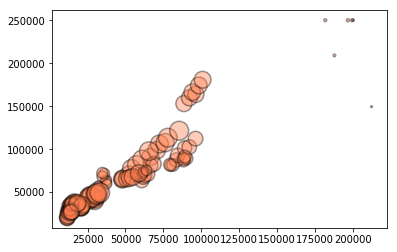

In [9]:
plt.scatter(census_pd["Per Capita Income"], census_pd["Household Income"], marker="o",
            edgecolors="black", linewidths=1.5,
            s=census_pd["Population"]/100, alpha=0.4, c="coral")

In [10]:
## Data frames for each zip code
df_77002 = census_pd[census_pd.Zipcode == '77002']
df_77003 = census_pd[census_pd.Zipcode == '77003']
df_77004 = census_pd[census_pd.Zipcode == '77004']
df_77005 = census_pd[census_pd.Zipcode == '77005']
df_77006 = census_pd[census_pd.Zipcode == '77006']
df_77007 = census_pd[census_pd.Zipcode == '77007']
df_77008 = census_pd[census_pd.Zipcode == '77008']
df_77009 = census_pd[census_pd.Zipcode == '77009']
df_77010 = census_pd[census_pd.Zipcode == '77010']
df_77011 = census_pd[census_pd.Zipcode == '77011']
df_77012 = census_pd[census_pd.Zipcode == '77012']
df_77019 = census_pd[census_pd.Zipcode == '77019']
df_77020 = census_pd[census_pd.Zipcode == '77020']
df_77021 = census_pd[census_pd.Zipcode == '77021']
df_77023 = census_pd[census_pd.Zipcode == '77023']
df_77025 = census_pd[census_pd.Zipcode == '77025']
df_77026 = census_pd[census_pd.Zipcode == '77026']
df_77027 = census_pd[census_pd.Zipcode == '77027']
df_77030 = census_pd[census_pd.Zipcode == '77030']

In [38]:
## ALL Zip Codes income trend
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_77002.Year, y=df_77002['Household Income'],name='77002'))
fig.add_trace(go.Scatter(x=df_77003.Year, y=df_77003['Household Income'],name='77003'))
fig.add_trace(go.Scatter(x=df_77004.Year, y=df_77004['Household Income'],name='77004'))
# fig.add_trace(go.Scatter(x=df_77005.Year, y=df_77005['Household Income'],name='77005'))
fig.add_trace(go.Scatter(x=df_77006.Year, y=df_77006['Household Income'],name='77006'))
fig.add_trace(go.Scatter(x=df_77007.Year, y=df_77007['Household Income'],name='77007'))
fig.add_trace(go.Scatter(x=df_77008.Year, y=df_77008['Household Income'],name='77008'))
fig.add_trace(go.Scatter(x=df_77009.Year, y=df_77009['Household Income'],name='77009'))
# fig.add_trace(go.Scatter(x=df_77010.Year, y=df_77010['Household Income'],name='77010'))
fig.add_trace(go.Scatter(x=df_77011.Year, y=df_77011['Household Income'],name='77011'))
fig.add_trace(go.Scatter(x=df_77012.Year, y=df_77012['Household Income'],name='77012'))
fig.add_trace(go.Scatter(x=df_77019.Year, y=df_77019['Household Income'],name='77019'))
fig.add_trace(go.Scatter(x=df_77020.Year, y=df_77020['Household Income'],name='77020'))
fig.add_trace(go.Scatter(x=df_77021.Year, y=df_77021['Household Income'],name='77021'))
fig.add_trace(go.Scatter(x=df_77023.Year, y=df_77023['Household Income'],name='77023'))
fig.add_trace(go.Scatter(x=df_77025.Year, y=df_77025['Household Income'],name='77025'))
fig.add_trace(go.Scatter(x=df_77026.Year, y=df_77026['Household Income'],name='77026'))
fig.add_trace(go.Scatter(x=df_77027.Year, y=df_77027['Household Income'],name='77027'))
fig.add_trace(go.Scatter(x=df_77030.Year, y=df_77030['Household Income'],name='77030'))
fig.update_layout(
    title_text="Inner Houston Zip Codes - Household Income Trend"
)
fig.show()

In [52]:
### 4 Chosen Zip Codes income trend
fig = go.Figure()
# Create traces
fig.add_trace(go.Scatter(x=df_77003.Year, y=df_77003['Household Income'],name='77003'))
fig.add_trace(go.Scatter(x=df_77007.Year, y=df_77007['Household Income'],name='77007'))
fig.add_trace(go.Scatter(x=df_77008.Year, y=df_77008['Household Income'],name='77008'))
fig.add_trace(go.Scatter(x=df_77026.Year, y=df_77026['Household Income'],name='77026'))

fig.update_layout(title_text="Chosen Zip Codes")

fig.show()

In [78]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]],
                   subplot_titles=("77003", "77007", "77026", "77008"))

# Top left
fig.add_trace(
    go.Bar(x=df_77003.Year, y=df_77003['Median Age'], name="Age"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77003.Year, y=df_77003['Household Income'], name="Income"),
    row=1, col=1, secondary_y=True)

# Top right
fig.add_trace(
    go.Bar(x=df_77007.Year, y=df_77007['Median Age'], name="Age"),
    row=1, col=2, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77007.Year, y=df_77007['Household Income'], name="Income"),
    row=1, col=2, secondary_y=True)

# Bottom right
fig.add_trace(
    go.Bar(x=df_77008.Year, y=df_77008['Median Age'], name="Age"),
    row=2, col=2, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77008.Year, y=df_77008['Household Income'], name="Income"),
    row=2, col=2, secondary_y=True)

# Bottom left
fig.add_trace(
    go.Bar(x=df_77026.Year, y=df_77026['Median Age'], name=" Age"),
    row=2, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77026.Year, y=df_77026['Household Income'], name="Income"),
    row=2, col=1, secondary_y=True)

fig.update_layout(
    title_text="Age vs. Median Household Income")

## Y-axis formatting
fig.update_yaxes(range=[30, 38], row=1, col=1,showgrid=False,
                 title_text="<b>Age</b> (years)",secondary_y=False)
fig.update_yaxes(range=[30, 38], row=1, col=2,showgrid=False,
                 secondary_y=False)
fig.update_yaxes(row=1, col=2,title_text="<b>Income</b> ($)",
                 secondary_y=True)
fig.update_yaxes(range=[30, 38],row=2, col=1,showgrid=False,
                 title_text="<b>Age</b> (years)", secondary_y=False)
fig.update_yaxes(range=[30, 38], row=2, col=2,showgrid=False,
                 secondary_y=False)
fig.update_yaxes(row=2, col=2,title_text="<b>Income</b> ($)",
                 secondary_y=True)
## X-axis formatting
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_xaxes(title_text="Year", showgrid=False, row=2, col=2)

fig.show()

In [79]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]],
                   subplot_titles=("77003", "77007", "77026", "77008"))

# Top left
fig.add_trace(
    go.Bar(x=df_77003.Year, y=df_77003['Median Age'],name="Age"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77003.Year, y=df_77003['Population'], name="Population"),
    row=1, col=1, secondary_y=True)

# Top right
fig.add_trace(
    go.Bar(x=df_77007.Year, y=df_77007['Median Age'], name="Age"),
    row=1, col=2, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77007.Year, y=df_77007['Population'], name="Population"),
    row=1, col=2, secondary_y=True)

# Bottom right
fig.add_trace(
    go.Bar(x=df_77008.Year, y=df_77008['Median Age'], name="Age"),
    row=2, col=2, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77008.Year, y=df_77008['Population'], name="Population"),
    row=2, col=2, secondary_y=True)

# Bottom left
fig.add_trace(
    go.Bar(x=df_77026.Year, y=df_77026['Median Age'], name="Age"),
    row=2, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=df_77026.Year, y=df_77026['Population'], name="Population"),
    row=2, col=1, secondary_y=True)

fig.update_layout(
    title_text="Age vs. Population")

## Y-axis formatting
fig.update_yaxes(range=[30, 38], row=1, col=1,showgrid=False,
                 title_text="<b>Age</b> (years)",secondary_y=False)
fig.update_yaxes(range=[30, 38], row=1, col=2,showgrid=False,
                 secondary_y=False)
fig.update_yaxes(row=1, col=2,title_text="<b>Population</b> (people)",
                 secondary_y=True)
fig.update_yaxes(range=[30, 38],row=2, col=1,showgrid=False,
                 title_text="<b>Age</b> (years)", secondary_y=False)
fig.update_yaxes(range=[30, 38], row=2, col=2,showgrid=False,
                 secondary_y=False)
fig.update_yaxes(row=2, col=2,title_text="<b>Population</b> (people)",
                 secondary_y=True)
## X-axis formatting
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_xaxes(title_text="Year", showgrid=False, row=2, col=2)

fig.show()